In [1]:
import geopandas as gpd
import pandas as pd
from rasterio.crs import CRS


Load data

In [2]:
df_countries_hr = gpd.read_file('WB_countries_Admin0.geojson')
df_countries_hr.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [3]:
df_countries_hr.columns

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

Grab Relevant Countries

In [4]:
df_countries_hr.FORMAL_EN.unique()

array(['Republic of Indonesia', 'Malaysia', 'Republic of Chile',
       'Plurinational State of Bolivia', 'Republic of Peru',
       'Argentine Republic', 'Republic of Cyprus', 'Republic of India',
       "People's Republic of China", 'State of Israel',
       'West Bank and Gaza', 'Lebanese Republic',
       'Federal Democratic Republic of Ethiopia',
       'Republic of South Sudan', 'Federal Republic of Somalia',
       'Republic of Kenya', 'Islamic Republic of Pakistan',
       'Republic of Malawi', 'United Republic of Tanzania',
       'Syrian Arab Republic', 'French Republic', 'Republic of Suriname',
       'Co-operative Republic of Guyana', 'Republic of Korea',
       "Democratic People's Republic of Korea", 'Kingdom of Morocco',
       'Republic of Costa Rica', 'Republic of Nicaragua',
       'Republic of the Congo', 'Democratic Republic of the Congo',
       'Kingdom of Bhutan', 'Ukraine', 'Republic of Belarus',
       'Republic of Namibia', 'Republic of South Africa',
       '

In [5]:
us_territories = ['American Samoa', 
                  'Commonwealth of Puerto Rico', 
                  'Virgin Islands of the United States', 
                  'Commonwealth of the Northern Mariana Islands',
                  'Territory of Guam']

us = ['United States of America']

central_america_mainland = ['Belize',
                            'United Mexican States',
                            'Republic of Costa Rica',
                            'Republic of Honduras',
                            'Republic of Panama',
                            'Republic of Nicaragua',
                            'Republic of El Salvador',
                            'Republic of Guatemala',
                           ]

In [6]:
countries = us_territories + us + central_america_mainland
df_north_america_temp = df_countries_hr[df_countries_hr.FORMAL_EN.isin(countries)].reset_index(drop=True)
df_north_america_temp.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-83.64436 10.92593, -83.65148 ..."
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nicaragua,Nikaragua,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-85.70174 11.08088, -85.67758 ..."
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,El Salvador,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-90.09831 13.73140, -90.02117 ..."
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,Guatemala,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-89.36162 14.41548, -89.36379 14.446..."
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,Honduras,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-89.36162 14.41548, -89.34621 ..."


<AxesSubplot:>

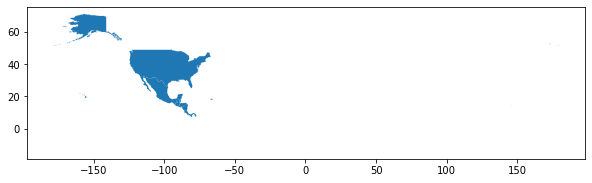

In [7]:
df_north_america_temp.plot(figsize=(10, 10))

In [8]:
df_us = df_countries_hr[df_countries_hr.FORMAL_EN.isin(us)].reset_index(drop=True)
df_us

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,149,150,Admin-0 country,2,Country,United States of America,,326625791,17,18560000.0,...,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,United States of America,None,Other,948.724319,1116.361761,"MULTIPOLYGON (((-95.16057 49.36949, -95.16034 ..."


In [9]:
df_us_area = df_us.to_crs(CRS.from_epsg(9822))
df_us_area['area_km'] = df_us_area.area / (1e6)
df_us_area.area_km

0    9.855166e+06
Name: area_km, dtype: float64

Get US Mainland

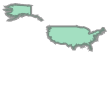

In [10]:
from shapely.ops import unary_union
us_mainland_and_alaska = unary_union([df_us.geometry[0][0], 
                                      df_us.geometry[0][1]])
us_mainland_and_alaska

<AxesSubplot:>

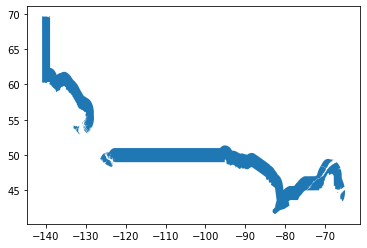

In [11]:
df_canada = df_countries_hr[df_countries_hr.FORMAL_EN == 'Canada'].reset_index(drop=True)
df_canada.geometry = df_canada.geometry.intersection(us_mainland_and_alaska.buffer(2))
df_canada.plot()

In [12]:
df_north_america_opera = pd.concat([df_north_america_temp, df_canada], axis=0).reset_index(drop=True)
df_north_america_opera.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-83.64436 10.92593, -83.65148 ..."
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nicaragua,Nikaragua,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-85.70174 11.08088, -85.67758 ..."
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,El Salvador,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-90.09831 13.73140, -90.02117 ..."
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,Guatemala,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-89.36162 14.41548, -89.36379 14.446..."
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,Honduras,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-89.36162 14.41548, -89.34621 ..."


<AxesSubplot:>

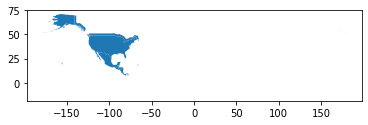

In [13]:
df_north_america_opera.plot()

In [14]:
df_north_america_opera.to_file('north_america_opera.geojson', driver='GeoJSON')

In [15]:
df_north_america_opera_area = df_north_america_opera.to_crs(CRS.from_epsg(9822))
df_north_america_opera_area['area_km'] = df_north_america_opera_area.geometry.area / (1e3 ** 2)
df_north_america_opera_area.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,area_km
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-7370588.083 2620706.952, -737...",67933.871079
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nikaragua,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-7487417.465 2850249.316, -748...",162982.576266
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-7461535.798 3482887.055, -746...",25640.961834
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-7345471.423 3444096.313, -7342225.5...",131994.801050
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-7345471.423 3444096.313, -734...",137857.472485


In [16]:
df_north_america_opera_area.to_csv('opera_na_areas.csv')

In [17]:
df_north_america_opera_dissolved = df_north_america_opera.dissolve(by='CONTINENT').reset_index(drop=False)
df_north_america_opera_dissolved.to_file('north_america_opera_dissolved.geojson', driver='GeoJSON')

<AxesSubplot:>

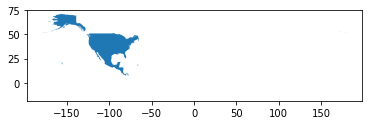

In [18]:
df_north_america_opera_dissolved.plot()

# Areas

In [19]:
df_cen_am = df_countries_hr[df_countries_hr.FORMAL_EN.isin(central_america_mainland)].reset_index(drop=True)


In [20]:
central_america_area = df_cen_am.dissolve(by='CONTINENT').geometry.area[0]

<ipython-input-20-a239aa2c6673>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  central_america_area = df_cen_am.dissolve(by='CONTINENT').geometry.area[0]


In [21]:
total_area = df_north_america_opera_dissolved.geometry.area[0]
total_area

<ipython-input-21-ac2fc104808e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_area = df_north_america_opera_dissolved.geometry.area[0]


1519.385483763609

In [22]:
canada_geo_area = df_canada.geometry.area[0]
canada_geo_area

<ipython-input-22-f265a1d71a09>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  canada_geo_area = df_canada.geometry.area[0]


184.75604988696443

In [23]:
f'Canada percentage of OPERA Disp: {canada_geo_area / total_area * 100: 1.2f}%'

'Canada percentage of OPERA Disp:  12.16%'

In [26]:
f'Central America percentage: {central_america_area / total_area * 100 : 1.2f}%'

'Central America percentage:  14.31%'

In [38]:
df_north_america_opera_area

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,area_km,perecent_area
0,26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,12,79260.0,...,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326,"MULTIPOLYGON (((-7370588.083 2620706.952, -737...",6.793387e+04,0.479485
1,27,28,Admin-0 country,2,Sovereign country,Republic of Nicaragua,,6025951,13,33550.0,...,Nicaragua,尼加拉瓜,Nicaragua,None,LCR,22.117174,10.717862,"MULTIPOLYGON (((-7487417.465 2850249.316, -748...",1.629826e+05,1.150350
2,112,113,Admin-0 country,2,Sovereign country,Republic of El Salvador,,6172011,13,54790.0,...,El Salvador,萨尔瓦多,El Salvador,None,LCR,8.557876,1.716492,"MULTIPOLYGON (((-7461535.798 3482887.055, -746...",2.564096e+04,0.180977
3,113,114,Admin-0 country,2,Sovereign country,Republic of Guatemala,,15460732,14,131800.0,...,Guatemala,危地马拉,Guatemala,None,LCR,17.747934,9.174822,"POLYGON ((-7345471.423 3444096.313, -7342225.5...",1.319948e+05,0.931634
4,131,132,Admin-0 country,2,Sovereign country,Republic of Honduras,,9038741,13,43190.0,...,Honduras,洪都拉斯,Honduras,None,LCR,25.891328,9.424318,"MULTIPOLYGON (((-7345471.423 3444096.313, -734...",1.378575e+05,0.973014
5,149,150,Admin-0 country,2,Country,United States of America,,326625791,17,18560000.0,...,Hoa Kỳ,美国,United States of America,None,Other,948.724319,1116.361761,"MULTIPOLYGON (((-4015719.513 5710816.828, -402...",9.855166e+06,69.558897
6,151,152,Admin-0 country,2,Sovereign country,United Mexican States,,124574795,17,2307000.0,...,México,墨西哥,Mexico,None,LCR,182.066213,174.202021,"MULTIPOLYGON (((-6487588.345 4819424.208, -649...",2.164335e+06,15.276123
7,152,153,Admin-0 country,2,Sovereign country,Belize,,360346,10,3088.0,...,Belize,伯利兹,Belize,None,LCR,10.856288,1.894414,"MULTIPOLYGON (((-7123364.954 3540794.862, -714...",2.647704e+04,0.186878
8,153,154,Admin-0 country,2,Sovereign country,Republic of Panama,,3753142,12,93120.0,...,Panama,巴拿马,Panama,None,LCR,35.640400,6.120871,"MULTIPOLYGON (((-7443310.478 2414903.171, -744...",1.016052e+05,0.717141
9,192,193,Admin-0 country,2,Dependency,Virgin Islands of the United States,,107268,9,3792.0,...,Quần đảo Virgin thuộc Mỹ,美屬維爾京群島,U.S. Virgin Islands (US),Name in italic,Other,1.705456,0.030265,"MULTIPOLYGON (((-5295795.774 1348129.071, -529...",4.167671e+02,0.002942


In [32]:
df_north_america_opera_area['area_km'].sum()

14168088.718364768

In [35]:
df_north_america_opera_area['perecent_area']  = df_north_america_opera_area['area_km'] / df_north_america_opera_area['area_km'].sum() * 100

In [41]:
print(df_north_america_opera_area[['FORMAL_EN', 'perecent_area']].round(2))

                                       FORMAL_EN  perecent_area
0                         Republic of Costa Rica           0.48
1                          Republic of Nicaragua           1.15
2                        Republic of El Salvador           0.18
3                          Republic of Guatemala           0.93
4                           Republic of Honduras           0.97
5                       United States of America          69.56
6                          United Mexican States          15.28
7                                         Belize           0.19
8                             Republic of Panama           0.72
9            Virgin Islands of the United States           0.00
10                   Commonwealth of Puerto Rico           0.07
11                                American Samoa           0.00
12                             Territory of Guam           0.00
13  Commonwealth of the Northern Mariana Islands           0.00
14                                      